In [81]:
%matplotlib inline

import os
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing, datasets
from sklearn.neighbors import KNeighborsClassifier

plt.style.use("ggplot")

# Load and parse Iris data set from URL

In [82]:
iris = os.path.join("https://archive.ics.uci.edu", "ml", "machine-learning-databases", "iris", "iris.data")
data = pd.read_csv(iris, header=None, encoding="utf-8")

# Process and clean the data

In [83]:
proc = preprocessing.LabelEncoder()
sepal_length = proc.fit_transform(list(data[0]))
sepal_width = proc.fit_transform(list(data[1]))
petal_length = proc.fit_transform(list(data[2]))
petal_width = proc.fit_transform(list(data[3]))
species = proc.fit_transform(list(data[4]))

predict = 4 # Species 

x = list(zip(sepal_length, sepal_width, petal_length, petal_width))
y = list(species)

# Train and predict species

In [84]:
variations = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
best = 0
worst = 100
results = []

for i in range(105):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.7)

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    
    accuracy = model.score(x_test, y_test)
    if accuracy > best:
        best = accuracy
    elif accuracy < worst:
        worst = accuracy
    
    prediction = model.predict(x_test)
    results.append(f"Prediction:\t{variations[prediction[i]].ljust(10)}\t\tActual: {variations[y_test[i]].ljust(10)}\t\tAccuracy: {str(round(accuracy * 100, 2)).ljust(5)}%\tData: {x_test[i]}")

In [85]:
for result in results:
    print(result)
    
print(f"\nHighest Accuracy: {round((best * 100), 2)}%")
print(f"Worst Accuracy: {round((worst * 100), 2)}%")

Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 96.19%	Data: (14, 7, 17, 9)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 93.33%	Data: (20, 7, 27, 11)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 93.33%	Data: (23, 9, 20, 10)
Prediction:	Iris-virginica		Actual: Iris-versicolor		Accuracy: 92.38%	Data: (17, 6, 27, 12)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 94.29%	Data: (12, 4, 16, 9)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 93.33%	Data: (17, 8, 21, 11)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 99.05%	Data: (19, 1, 21, 11)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 96.19%	Data: (7, 9, 6, 1)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 97.14%	Data: (14, 8, 18, 9)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 93.33%	Data: (20, 4, 25, 11)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 97.14%	Data: (22, 7, 22

# Graphical illustration

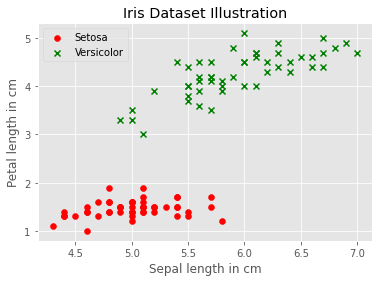

In [86]:
y = data.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

X = data.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="green", marker="x", label="Versicolor")

plt.title("Iris Dataset Illustration")
plt.xlabel("Sepal length in cm")
plt.ylabel("Petal length in cm")
plt.grid(True)
plt.legend()


# 3D Modeling (Not Iris related yet)

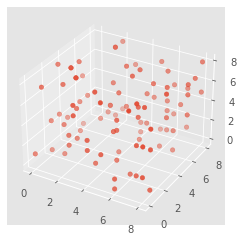

In [87]:
# import random
# from mpl_toolkits import mplot3d


# x = [random.randrange(0, 9) for _ in range(100)]
# y = [random.randrange(0, 9) for _ in range(100)]
# z = [random.randrange(0, 9) for _ in range(100)]

# fig = plt.figure()
# ax = plt.axes(projection="3d")
# ax.scatter3D(x, y, z)



# Perceptron method

In [88]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.w_ = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Conversion example; When a neural network reaches the peak of preciseness.

Text(0, 0.5, 'Amount of updates')

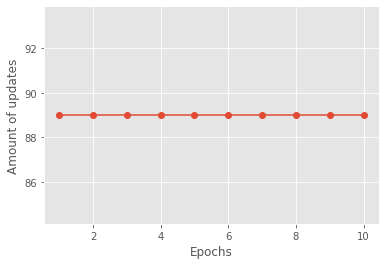

In [89]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Amount of updates")

# Convenience function to vizualize decision boundries for 2-dimensional datasets

<ipython-input-90-c5da0ced147b>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


IndexError: tuple index out of range

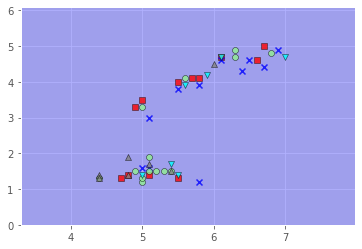

In [90]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class example
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors="black")

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal length in cm")
plt.xlabel("Petal length in cm")
plt.legend(loc="upper left")
    